In [2]:
import pandas as pd
import numpy as np
import io
import itertools
import requests
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
def format_mth(mth):
    mth = mth.drop(mth.index[:4])
    mth.columns = ['Year', 'Avg Temp']
    mth['Year'] = mth['Year'].str[:4].astype(int)
    mth['Avg Temp'] = mth['Avg Temp'].apply(lambda x: (float(x)-32)*(5/9))
    return mth

In [4]:
april=pd.read_csv('262-tavg-1-4-1950-2019.csv')
april = april.drop(' April', axis=1)
april = format_mth(april)
april

,Year,Avg Temp
4,1950,6.611111
5,1951,8.111111
6,1952,10.388889
7,1953,7.833333
8,1954,12.000000
...,...,...
69,2015,11.611111
70,2016,10.888889
71,2017,12.222222
72,2018,6.000000


In [5]:
may=pd.read_csv('262-tavg-1-5-1950-2019.csv')
may = may.drop(' May', axis=1)
may = format_mth(may)
may

,Year,Avg Temp
4,1950,15.944444
5,1951,16.944444
6,1952,15.888889
7,1953,16.388889
8,1954,13.611111
...,...,...
69,2015,16.777778
70,2016,16.222222
71,2017,15.833333
72,2018,20.222222


In [6]:
june=pd.read_csv('262-tavg-1-6-1950-2019.csv')
june= june.drop(' June', axis=1)
june = format_mth(june)
june

,Year,Avg Temp
4,1950,20.777778
5,1951,19.555556
6,1952,23.666667
7,1953,23.166667
8,1954,22.611111
...,...,...
69,2015,21.666667
70,2016,22.888889
71,2017,21.888889
72,2018,23.166667


In [7]:
july = pd.read_csv('262-tavg-1-7-1950-2019.csv')
july= july.drop(' July', axis=1)
july = format_mth(july)

In [8]:
august = pd.read_csv('262-tavg-1-8-1950-2019.csv')
august= august.drop(' August', axis=1)
august = format_mth(august)

In [9]:
september = pd.read_csv('262-tavg-1-9-1950-2019.csv')
september = september.drop(' September', axis=1)
september = format_mth(september)

In [10]:
october = pd.read_csv('262-tavg-1-10-1950-2019.csv')
october = october.drop(' October', axis=1)
october = format_mth(october)

In [11]:
all_temps = pd.merge(april, may, on="Year")
all_temps = pd.merge(all_temps, june, on="Year")
all_temps = pd.merge(all_temps, july, on="Year")
all_temps = pd.merge(all_temps, august, on='Year')
all_temps = pd.merge(all_temps, september, on='Year')
all_temps = pd.merge(all_temps, october, on="Year")

all_temps.columns = ['Year', 'April Avg Temps (C)', 'May Avg Temps (C)', 'June Avg Temps (C)', 'July Avg Temps (C)', 'August Avg Temps (C)', 'September Avg Temps (C)', 'October Avg Temps (C)']
all_temps

,Year,April Avg Temps (C),May Avg Temps (C),June Avg Temps (C),July Avg Temps (C),August Avg Temps (C),September Avg Temps (C),October Avg Temps (C)
0,1950,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333
1,1951,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778
2,1952,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444
3,1953,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556
4,1954,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556
...,...,...,...,...,...,...,...,...
65,2015,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333
66,2016,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556
67,2017,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556
68,2018,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778


      co2_ppm
Year         
1950    311.3
1951    311.8
1952    312.2
1953    312.6
1954    313.2
...       ...
2026    437.0
2027    440.0
2028    443.0
2029    448.0
2030    450.0

[81 rows x 1 columns]


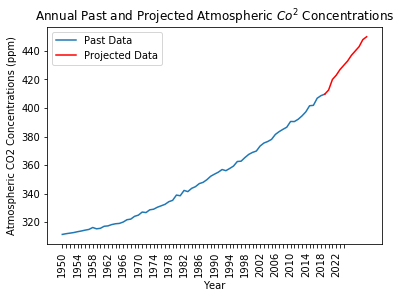

In [12]:
co2 = pd.read_excel("co2ppm.xlsx")

y1 = co2['co2_ppm'].loc[:69]
y2 = co2['co2_ppm'].loc[69:]
plt.plot(co2['co2_ppm'].loc[:69], label="Past Data")
plt.plot(co2['co2_ppm'].loc[69:], label="Projected Data", color='red')
plt.xticks(np.arange(75), range(1950, 2030), rotation=90)
ax=plt.gca()
[label.set_visible(False) for (index,label) in enumerate(ax.xaxis.get_ticklabels()) if index % 4 != 0]
plt.legend(loc="upper left")
plt.ylabel("Atmospheric CO2 Concentrations (ppm)")
plt.xlabel('Year')
plt.title('Annual Past and Projected Atmospheric $Co^2$ Concentrations')
plt.savefig('co2.png', bbox_inches='tight')
annual_co2 = co2.set_index('Year')
print(annual_co2)

In [13]:
temp_co2 = pd.merge(all_temps, co2, on='Year')
temp_co2

,Year,April Avg Temps (C),May Avg Temps (C),June Avg Temps (C),July Avg Temps (C),August Avg Temps (C),September Avg Temps (C),October Avg Temps (C),co2_ppm
0,1950,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30
1,1951,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80
2,1952,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20
3,1953,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60
4,1954,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20
...,...,...,...,...,...,...,...,...,...
65,2015,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59
66,2016,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86
67,2017,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87
68,2018,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68


In [14]:
def format_mth_pcp(mth):
    mth = mth.drop(mth.index[:4])
    mth.columns = ['Year', 'Average Precipitation (mm)']
    mth['Year'] = mth['Year'].str[:4].astype(int)
    mth['Average Precipitation (mm)'] = mth['Average Precipitation (mm)'].apply(lambda x: float(x)*25.4)
    return mth

In [15]:
april_pcp = pd.read_csv('362-pcp-1-4-1950-2019.csv')
april_pcp = april_pcp.drop(' April', axis=1)
april_pcp = format_mth_pcp(april_pcp)
april_pcp.columns = ['Year', "April Avg Precipitation (mm)"]

In [16]:
may_pcp = pd.read_csv('362-pcp-1-5-1950-2019.csv')
may_pcp = may_pcp.drop(' May', axis=1)
may_pcp = format_mth_pcp(may_pcp)
may_pcp.columns = ['Year', "May Avg Precipitation (mm)"]

In [17]:
june_pcp = pd.read_csv('362-pcp-1-6-1950-2019.csv')
june_pcp = june_pcp.drop(' June', axis=1)
june_pcp = format_mth_pcp(june_pcp)
june_pcp.columns = ['Year', "June Avg Precipitation (mm)"]

In [18]:
july_pcp = pd.read_csv('362-pcp-1-7-1950-2019.csv')
july_pcp = july_pcp.drop(' July', axis=1)
july_pcp = format_mth_pcp(july_pcp)
july_pcp.columns = ['Year', "July Avg Precipitation (mm)"]

In [19]:
august_pcp = pd.read_csv('362-pcp-1-8-1950-2019.csv')
august_pcp = august_pcp.drop(' August', axis=1)
august_pcp = format_mth_pcp(august_pcp)
august_pcp.columns = ['Year', "August Avg Precipitation (mm)"]

In [20]:
september_pcp = pd.read_csv('362-pcp-1-9-1950-2019.csv')
september_pcp = september_pcp.drop(' September', axis=1)
september_pcp = format_mth_pcp(september_pcp)
september_pcp.columns = ['Year', "September Avg Precipitation (mm)"]

In [21]:
october_pcp = pd.read_csv('362-pcp-1-10-1950-2019.csv')
october_pcp = october_pcp.drop(' October', axis=1)
october_pcp = format_mth_pcp(october_pcp)
october_pcp.columns = ['Year', "October Avg Precipitation (mm)"]

In [22]:
all_pcp = pd.merge(april_pcp, may_pcp, on="Year")
all_pcp = pd.merge(all_pcp, june_pcp, on="Year")
all_pcp = pd.merge(all_pcp, july_pcp, on="Year")
all_pcp = pd.merge(all_pcp, august_pcp, on='Year')
all_pcp = pd.merge(all_pcp, september_pcp, on='Year')
all_pcp = pd.merge(all_pcp, october_pcp, on="Year")

In [23]:
climate_data = pd.merge(all_pcp, temp_co2, on='Year')
climate_data

,Year,April Avg Precipitation (mm),May Avg Precipitation (mm),June Avg Precipitation (mm),July Avg Precipitation (mm),August Avg Precipitation (mm),September Avg Precipitation (mm),October Avg Precipitation (mm),April Avg Temps (C),May Avg Temps (C),June Avg Temps (C),July Avg Temps (C),August Avg Temps (C),September Avg Temps (C),October Avg Temps (C),co2_ppm
0,1950,83.566,101.854,111.760,121.666,87.376,82.550,41.656,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30
1,1951,90.424,89.916,149.098,111.760,105.156,82.296,68.580,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80
2,1952,75.184,89.154,98.806,86.106,97.028,44.704,11.938,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20
3,1953,90.932,99.060,96.266,89.662,58.166,35.052,26.670,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60
4,1954,91.948,87.122,103.886,62.484,120.650,54.102,102.870,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,89.916,133.858,167.640,130.810,95.250,76.200,56.642,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59
66,2016,92.710,107.950,83.058,136.398,148.336,111.252,59.436,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86
67,2017,120.904,131.572,98.298,102.616,104.140,54.356,106.934,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87
68,2018,68.326,100.330,149.098,94.742,127.508,141.478,96.520,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68


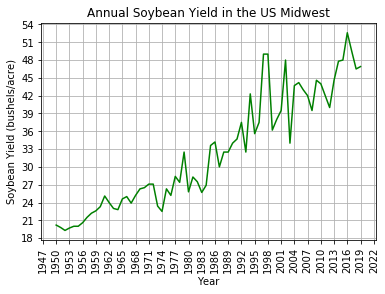

In [24]:
soy_yield = pd.read_excel('annual_midwest_soybean_yield.xlsx')

tick_spacing = 3
fig, ax = plt.subplots(1,1)
ax.plot(soy_yield['Year'], soy_yield['Soybean Yield (bushels/acre)'], color='green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Year')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('Soybean Yield (bushels/acre)')
plt.xticks(rotation=90)
plt.xlabel('Year')
ax.set_title("Annual Soybean Yield in the US Midwest")
plt.grid()
plt.savefig('soy_yield.png', bbox_inches='tight')
plt.show()
all_data = pd.merge(climate_data, soy_yield, on = 'Year')

In [28]:

all_data
all_data.to_csv('all_data.csv', index=False)
all_data

,Year,April Avg Precipitation (mm),May Avg Precipitation (mm),June Avg Precipitation (mm),July Avg Precipitation (mm),August Avg Precipitation (mm),September Avg Precipitation (mm),October Avg Precipitation (mm),April Avg Temps (C),May Avg Temps (C),June Avg Temps (C),July Avg Temps (C),August Avg Temps (C),September Avg Temps (C),October Avg Temps (C),co2_ppm,Soybean Yield (bushels/acre)
0,1950,83.566,101.854,111.760,121.666,87.376,82.550,41.656,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30,20.2
1,1951,90.424,89.916,149.098,111.760,105.156,82.296,68.580,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80,19.8
2,1952,75.184,89.154,98.806,86.106,97.028,44.704,11.938,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20,19.3
3,1953,90.932,99.060,96.266,89.662,58.166,35.052,26.670,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60,19.7
4,1954,91.948,87.122,103.886,62.484,120.650,54.102,102.870,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,89.916,133.858,167.640,130.810,95.250,76.200,56.642,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59,48.0
66,2016,92.710,107.950,83.058,136.398,148.336,111.252,59.436,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86,52.6
67,2017,120.904,131.572,98.298,102.616,104.140,54.356,106.934,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87,49.5
68,2018,68.326,100.330,149.098,94.742,127.508,141.478,96.520,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68,46.5


In [103]:
variations = []
for cols in all_data:
    print(cols, ': ', np.var(all_data[cols]))

Year :  408.25
April Avg Precipitation (mm) :  501.37233497551
May Avg Precipitation (mm) :  682.7335390726528
June Avg Precipitation (mm) :  749.5221875885713
July Avg Precipitation (mm) :  641.6679200848977
August Avg Precipitation (mm) :  511.22005721551
September Avg Precipitation (mm) :  719.9856041338778
October Avg Precipitation (mm) :  819.9983073338776
April Avg Temps (C) :  2.8537068531116154
May Avg Temps (C) :  2.360403124212647
June Avg Temps (C) :  1.1708018392542219
July Avg Temps (C) :  1.2882489292013113
August Avg Temps (C) :  1.2846334089191227
September Avg Temps (C) :  1.5030637440161236
October Avg Temps (C) :  2.270871756109852
co2_ppm :  877.0068427755101
Soybean Yield (bushels/acre) :  91.34154285714285


In [138]:
np_all_data = all_data.to_numpy()
X = np_all_data[:70, :16] 
y = np_all_data[:70, 16:]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

yt_list = y_test.tolist()
yp_list = y_pred.tolist()
errors = []
for x in range(len(y_test.tolist())):
    errors.append(metrics.mean_absolute_error(yt_list[x], yp_list[x]))
    
avg_mae = sum(errors)/len(errors)
df = pd.DataFrame({'Model': 'Simple','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})

In [153]:
proj_data = pd.read_excel('projected_vars.xlsx')
np_proj_data = proj_data.to_numpy()

y_proj = regressor.predict(np_proj_data)
y_proj = y_proj.flatten()
y_proj = y_proj.tolist()
print(y_proj)
pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100
print(avg_pct)
proj_df = pd.DataFrame({'Model': 'Simple', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})

[50.77225951932428, 51.498636719380784, 52.010973329235526, 52.56370252327383, 53.07978033856023, 53.590175371577175, 54.15024998758008, 54.660341900953085, 55.170572133170594, 55.77948927889008, 56.2457107643703]
1.0291690230770594


In [134]:
#ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
errors = abs(y_test.flatten() - y_pred.flatten())
avg_mae = sum(errors)/len(errors)
ridge_df = pd.DataFrame({'Model': 'Ridge','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})

In [152]:
y_proj_ridge = ridge.predict(np_proj_data)
y_proj_ridge = y_proj_ridge.flatten()
y_proj_ridge = y_proj_ridge.tolist()
print(y_proj)
pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100
print(avg_pct)
ridgeproj_df = pd.DataFrame({'Model': 'Ridge', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})

[50.46219439380599, 51.86082636846231, 52.55100056964699, 53.40325075181221, 54.092844843568, 54.78248486018305, 55.63441200493503, 56.32364406342958, 57.01295143390166, 58.02683318490949, 58.55314713485677]
1.4993591527226133


In [143]:
#lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
coeff_used = np.sum(lasso.coef_!=0)
errors = abs(y_test.flatten() - y_pred.flatten())
avg_mae = sum(errors)/len(errors)
lasso_df = pd.DataFrame({'Model': 'LASSO','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})

In [151]:
y_proj = lasso.predict(np_proj_data)
y_proj = y_proj.flatten()
y_proj = y_proj.tolist()
print(y_proj)
pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100
print(avg_pct)
lassoproj_df = pd.DataFrame({'Model': 'LASSO', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})

[50.46219439380599, 51.86082636846231, 52.55100056964699, 53.40325075181221, 54.092844843568, 54.78248486018305, 55.63441200493503, 56.32364406342958, 57.01295143390166, 58.02683318490949, 58.55314713485677]
1.4993591527226133


In [133]:
#ElasticNet 
from sklearn.linear_model import ElasticNet
enet25 = ElasticNet(alpha=0.25, l1_ratio=0.7)
enet25.fit(X_train, y_train)
y_pred = enet25.predict(X_test)
errors = abs(y_test.flatten() - y_pred.flatten())
avg_mae = sum(errors)/len(errors)
enet25_df = pd.DataFrame({'Model': 'ElasticNet 0.25','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})

,Model,Actual,Predicted,Mean Absolute Error,Average MAE
0,ElasticNet 0.25,28.4,32.815145,4.415145,3.106564
1,ElasticNet 0.25,48.0,48.980872,0.980872,3.106564
2,ElasticNet 0.25,34.2,33.645097,0.554903,3.106564
3,ElasticNet 0.25,28.3,32.809175,4.509175,3.106564
4,ElasticNet 0.25,37.5,38.053788,0.553788,3.106564
5,ElasticNet 0.25,49.5,49.842133,0.342133,3.106564
6,ElasticNet 0.25,22.8,24.835384,2.035384,3.106564
7,ElasticNet 0.25,30.0,35.358459,5.358459,3.106564
8,ElasticNet 0.25,23.0,24.764189,1.764189,3.106564
9,ElasticNet 0.25,25.8,31.588228,5.788228,3.106564


In [150]:
y_proj = enet25.predict(np_proj_data)
y_proj = y_proj.flatten()
y_proj = y_proj.tolist()
print(y_proj)
pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100
print(avg_pct)
enet25proj_df = pd.DataFrame({'Model': 'ElasticNet 0.25', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})

[50.595064979004064, 51.40256301884756, 51.968304901903025, 52.58443867179324, 53.152355847572835, 53.717137427988064, 54.337968354519035, 54.90285682379988, 55.46820103490472, 56.14458289364086, 56.657526754500054]
1.1382846837448624


In [130]:
enet5 = ElasticNet(alpha=0.5, l1_ratio=0.7)
enet5.fit(X_train, y_train)
y_pred = enet5.predict(X_test)
errors = abs(y_test.flatten() - y_pred.flatten())
avg_mae = sum(errors)/len(errors)
enet5_df = pd.DataFrame({'Model': 'ElasticNet 0.5','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})



In [149]:
y_proj = enet5.predict(np_proj_data)
y_proj = y_proj.flatten()
y_proj = y_proj.tolist()
print(y_proj)

pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100
print(avg_pct)

enet5proj_df = pd.DataFrame({'Model': 'ElasticNet 0.5', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})

[50.34323160807071, 51.24438821678302, 51.8268887947728, 52.479836681249935, 53.0631183934961, 53.64488582534011, 54.30006689888285, 54.88174061568748, 55.46378638864246, 56.19177582382531, 56.70199405461506]
1.1968047831983433


In [139]:
enet75 = ElasticNet(alpha=0.75, l1_ratio=0.7)
enet75.fit(X_train, y_train)
y_pred = enet75.predict(X_test)
errors = abs(y_test.flatten() - y_pred.flatten())
avg_mae = sum(errors)/len(errors)
enet75_df = pd.DataFrame({'Model': 'ElasticNet 0.75','Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Mean Absolute Error': errors, 'Average MAE': avg_mae})



In [148]:
y_proj = enet75.predict(np_proj_data)
y_proj = y_proj.flatten()
y_proj = y_proj.tolist()
print("estimates: ",  y_proj)

pct_change = []
for x in range(1, len(y_proj)):
    pct = abs((y_proj[x-1]-y_proj[x])/y_proj[x-1])
    pct_change.append(pct)
    
avg_pct = (sum(pct_change)/len(pct_change))*100

enet75proj_df = pd.DataFrame({'Model': 'ElasticNet 0.75', 'Predicted Value': y_proj, 'Average Annual Percent Change': avg_pct})
enet75proj_df

estimates:  [50.603060371266054, 51.78687924233503, 52.425017763169706, 53.1856290796606, 53.824391413458045, 54.4616464406958, 55.22401894094804, 55.86096455550472, 56.4979793205992, 57.38515383391308, 57.89804144788803]


,Model,Predicted Value,Average Annual Percent Change
0,ElasticNet 0.75,50.603060,1.356509
1,ElasticNet 0.75,51.786879,1.356509
2,ElasticNet 0.75,52.425018,1.356509
3,ElasticNet 0.75,53.185629,1.356509
4,ElasticNet 0.75,53.824391,1.356509
5,ElasticNet 0.75,54.461646,1.356509
6,ElasticNet 0.75,55.224019,1.356509
7,ElasticNet 0.75,55.860965,1.356509
8,ElasticNet 0.75,56.497979,1.356509
9,ElasticNet 0.75,57.385154,1.356509


In [144]:
frames = [df, ridge_df, lasso_df, enet25_df, enet5_df, enet75_df]
all_results_accuracy = pd.concat(frames)
all_results_accuracy.to_csv('all_results_accuracy.csv', index=False)

In [154]:
frames2 = [proj_df, ridgeproj_df, lassoproj_df, enet25proj_df, enet5proj_df, enet75proj_df]
all_projected_results = pd.concat(frames2)
all_projected_results.to_csv('all_projected_results.csv', index=False)

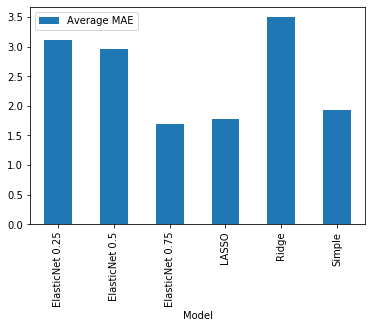